importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reading dataset

In [66]:
crop=pd.read_csv("/content/drive/MyDrive/archive (3) (1)/Crop_recommendation.csv")

reading dataset directly from kaggle

In [120]:
!kaggle datasets download -d atharvaingle/crop-recommendation-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [121]:
!unzip -q archive1.zip -d dataset

In [122]:
!ls dataset

Crop_recommendation.csv


mounting drive

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
crop.shape

(2200, 8)

In [69]:
crop.duplicated().sum()


0

In [70]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [71]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [72]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [73]:
crop.duplicated().sum()

0

In [74]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [75]:
corr=crop.corr()
corr

<ipython-input-75-a9d38c7394d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=crop.corr()


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

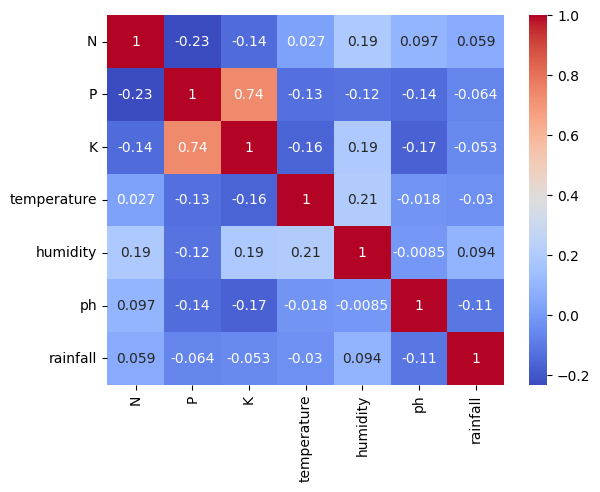

In [76]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

In [77]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [79]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [81]:
crop_dict={
    'rice':1,
    'maize':2,
    'jute':3,
    'cotton':4,
    'coconut':5,
    'papaya':6,
    'orange':7,
    'apple':8,
    'muskmelon':9,
    'watermelon':10,
    'grapes':11,
    'mango':12,
    'banana':13,
    'pomogranate':14,
    'lentil':15,
    'blackgram':16,
    'mungbean':17,
    'mothbeans':18,
    'pigeonpeas':19,
    'kidneybeans':20,
    'chickpea':21,
    'coffee':22,

}
crop['crop_num']=crop['label'].map(crop_dict)

In [82]:
crop['crop_num'].value_counts()

1.0     100
11.0    100
3.0     100
4.0     100
5.0     100
6.0     100
7.0     100
8.0     100
9.0     100
10.0    100
12.0    100
2.0     100
13.0    100
15.0    100
16.0    100
17.0    100
18.0    100
19.0    100
20.0    100
21.0    100
22.0    100
Name: crop_num, dtype: int64

In [83]:
crop.drop('label',axis = 1,inplace = True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1.0


In [84]:
x = crop.drop('crop_num',axis = 1)
y = crop['crop_num']

In [85]:
x.shape

(2200, 7)

In [86]:
y.shape

(2200,)

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [89]:
x_train.shape

(1760, 7)

In [90]:
x_test.shape

(440, 7)

In [91]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

ms.fit(x_train)
x_train = ms.transform(x_train)
x_test = ms.transform(x_test)

In [92]:
x_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [94]:
x_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

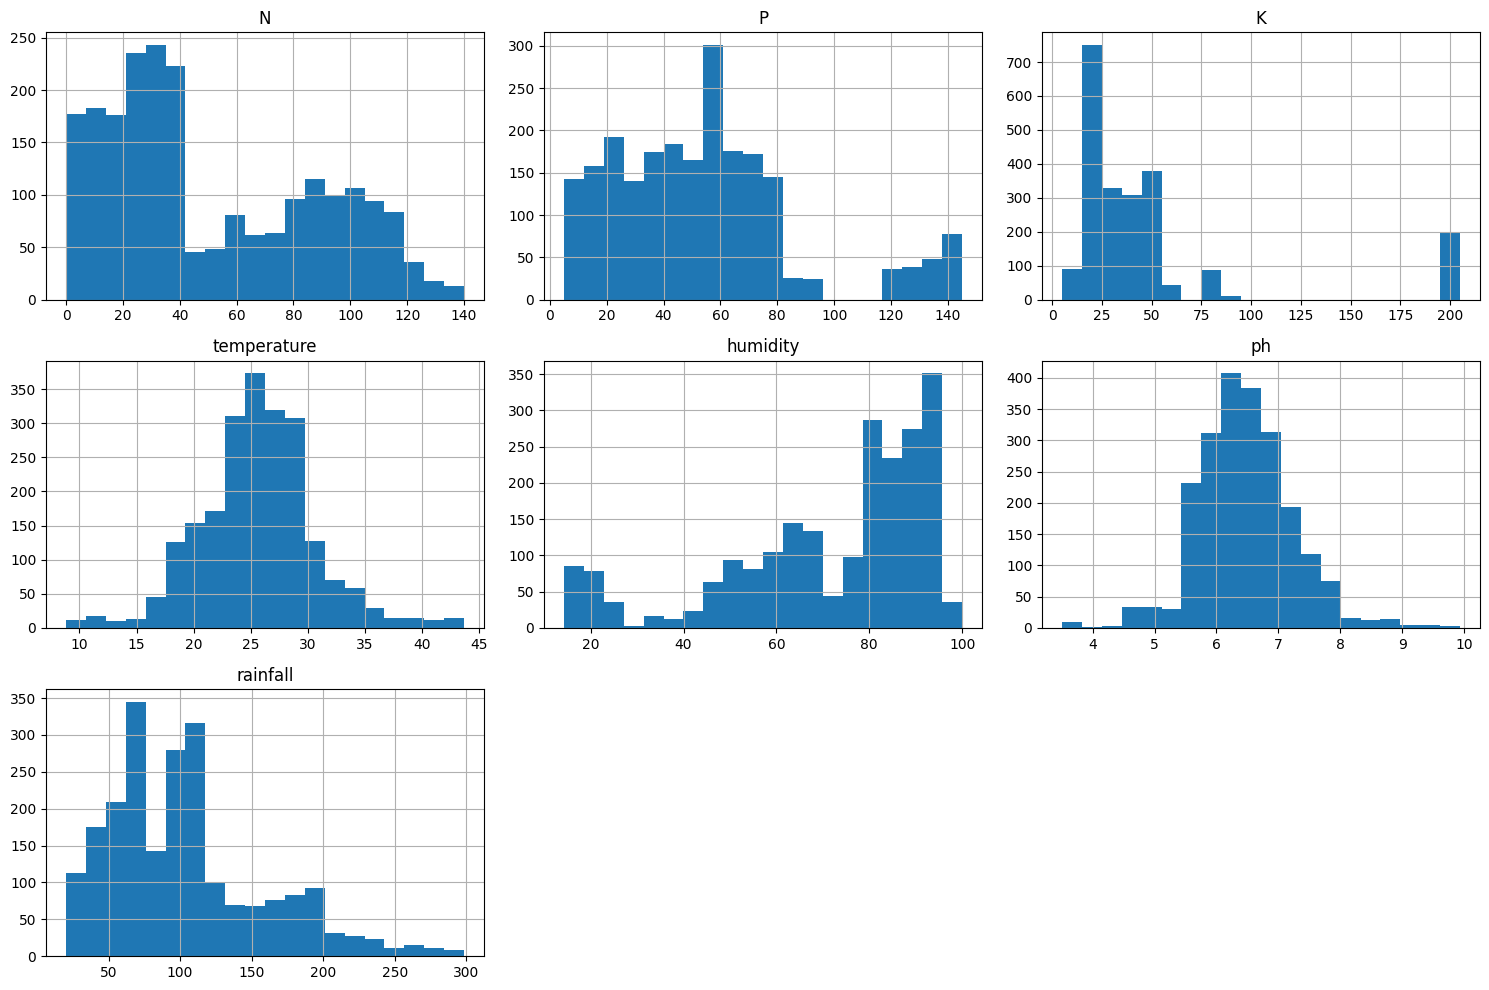

In [125]:
import matplotlib.pyplot as plt

# Assuming 'x' is your feature matrix DataFrame
x.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


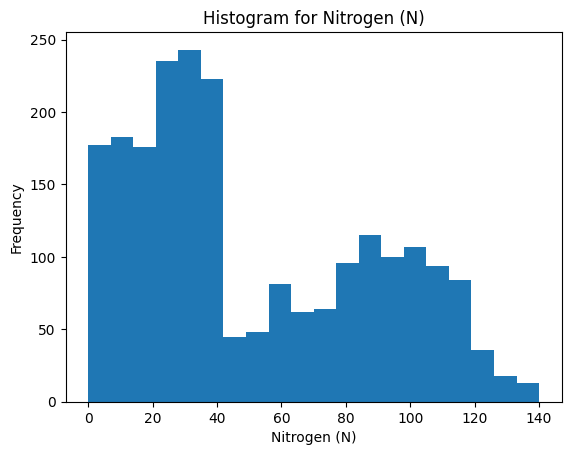

In [126]:
import matplotlib.pyplot as plt

# Example: Histogram for the 'N' column
plt.hist(x['N'], bins=20)
plt.title('Histogram for Nitrogen (N)')
plt.xlabel('Nitrogen (N)')
plt.ylabel('Frequency')
plt.show()


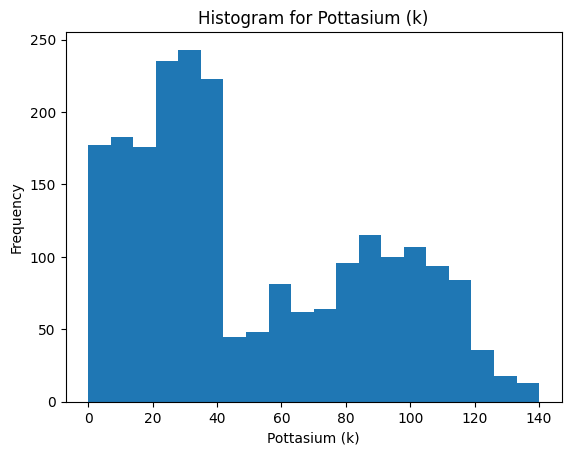

In [127]:
import matplotlib.pyplot as plt

# Example: Histogram for the 'N' column
plt.hist(x['N'], bins=20)
plt.title('Histogram for Pottasium (k)')
plt.xlabel('Pottasium (k)')
plt.ylabel('Frequency')
plt.show()


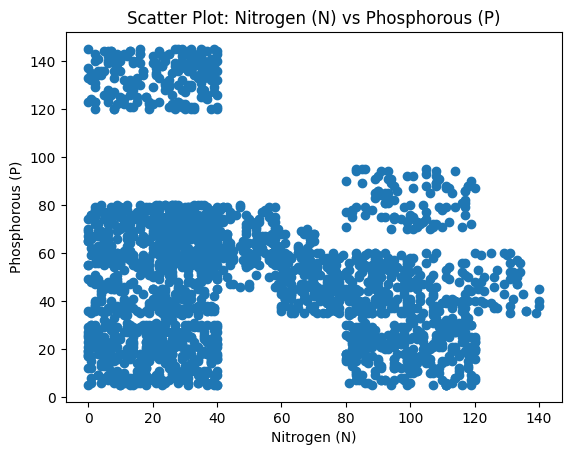

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Scatter plot for 'N' vs 'P'
plt.scatter(x['N'], x['P'])
plt.title('Scatter Plot: Nitrogen (N) vs Phosphorous (P)')
plt.xlabel('Nitrogen (N)')
plt.ylabel('Phosphorous (P)')
plt.show()

# Repeat for other pairs as needed


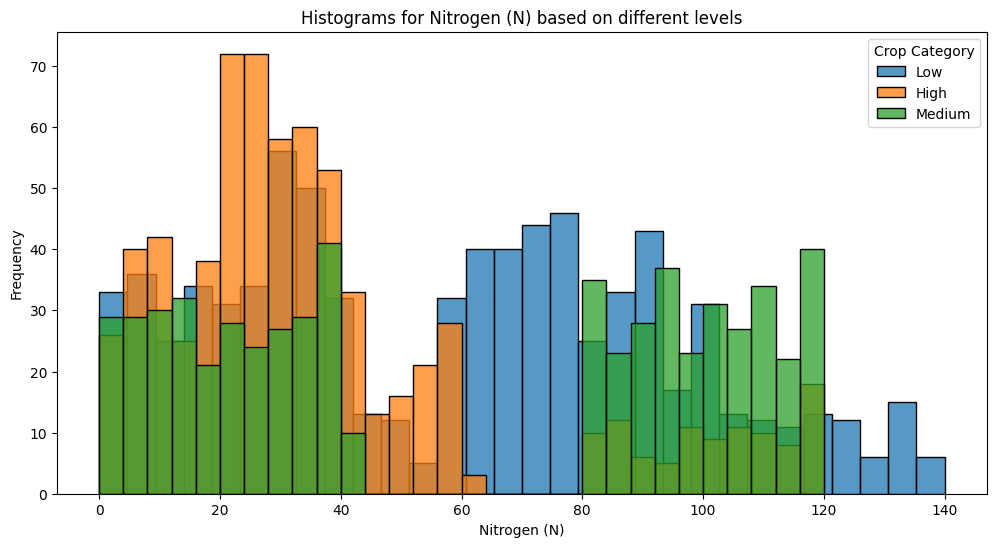

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'x' is your feature matrix DataFrame and 'y' is your target variable
# Add a categorical variable to represent different levels (for example, 'crop_num')
x['category'] = pd.cut(y, bins=3, labels=['Low', 'Medium', 'High'])

# Plot histograms based on different levels of the categorical variable
plt.figure(figsize=(12, 6))
for category in x['category'].unique():
    sns.histplot(x[x['category'] == category]['N'], bins=30, kde=False, label=category)

plt.title('Histograms for Nitrogen (N) based on different levels')
plt.xlabel('Nitrogen (N)')
plt.ylabel('Frequency')
plt.legend(title='Crop Category')
plt.show()


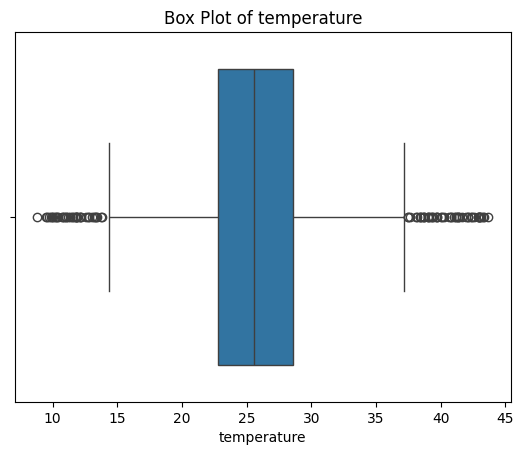

In [96]:

sns.boxplot(x=crop['temperature'])
plt.title('Box Plot of temperature')
plt.show()


In [97]:
from scipy.stats import zscore
z_scores = zscore(crop['temperature'])
threshold = 3
outliers = crop['temperature'][abs(z_scores) > threshold]


In [98]:

Q1 = crop['temperature'].quantile(0.25)
Q3 = crop['temperature'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = crop['temperature'][(crop['temperature'] < lower_bound) | (crop['temperature'] > upper_bound)]


In [104]:
from sklearn.impute import SimpleImputer

# ... (previous code)

for name, md in models.items():
    md.fit(x_train, y_train_imputed)
    y_pred = md.predict(x_test)

    # Handle NaN values in y_test and y_pred using SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    y_test_imputed = imputer.fit_transform(y_test.values.reshape(-1, 1)).flatten()
    y_pred_imputed = imputer.fit_transform(y_pred.reshape(-1, 1)).flatten()

    mse = mean_squared_error(y_test_imputed, y_pred_imputed)
    print(f"{name} with Mean Squared Error: {mse}")


Linear Regression with Mean Squared Error: 18.60505980168227
K-Nearest Neighbors with Mean Squared Error: 0.3960021491159393
Decision Tree with Mean Squared Error: 0.22045669457048467
Random Forest with Mean Squared Error: 0.5027953172531725
Gradient Boosting with Mean Squared Error: 1.0012838338936032


In [109]:
# Check for NaN values in x_train
print("NaN values in x_train:")
print(x_train.isnull().sum())

# Check for NaN values in x_test
print("\nNaN values in x_test:")
print(x_test.isnull().sum())

# Check for NaN values in y_train
print("\nNaN values in y_train:")
print(y_train.isnull().sum())

# Check for NaN values in y_test
print("\nNaN values in y_test:")
print(y_test.isnull().sum())


NaN values in x_train:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64

NaN values in x_test:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64

NaN values in y_train:
77

NaN values in y_test:
23


In [110]:
from sklearn.impute import SimpleImputer

# Assuming 'x_train', 'x_test', 'y_train', 'y_test' are your datasets

# Handle NaN values in y_train using SimpleImputer
imputer_y = SimpleImputer(strategy='mean')
y_train_imputed = imputer_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Handle NaN values in y_test using SimpleImputer
y_test_imputed = imputer_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Continue with your model training and evaluation


In [111]:
# Check for NaN values in x_train
print("NaN values in x_train:")
print(x_train.isnull().sum())

# Check for NaN values in x_test
print("\nNaN values in x_test:")
print(x_test.isnull().sum())

# Check for NaN values in y_train
print("\nNaN values in y_train:")
print(y_train.isnull().sum())

# Check for NaN values in y_test
print("\nNaN values in y_test:")
print(y_test.isnull().sum())

NaN values in x_train:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64

NaN values in x_test:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64

NaN values in y_train:
77

NaN values in y_test:
23


In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Create a mask to identify NaN values in y_train
mask_train = np.isnan(y_train)

# Replace NaN values with 0 (or any other suitable value)
y_train[mask_train] = 0

# Create a mask to identify NaN values in y_test
mask_test = np.isnan(y_test)

# Replace NaN values with 0 (or any other suitable value)
y_test[mask_test] = 0

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

for name, md in models.items():
    md.fit(x_train, y_train)
    y_pred = md.predict(x_test)

    print(f"{name} with accuracy: {accuracy_score(y_test, y_pred)}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression with accuracy: 0.9454545454545454
Naive Bayes with accuracy: 0.9954545454545455
Support Vector Machine with accuracy: 0.9613636363636363
K-Nearest Neighbors with accuracy: 0.9704545454545455
Decision Tree with accuracy: 0.9818181818181818
Random Forest with accuracy: 0.9931818181818182
Bagging with accuracy: 0.9863636363636363
AdaBoost with accuracy: 0.1409090909090909
Gradient Boosting with accuracy: 0.9818181818181818
Extra Trees with accuracy: 0.8863636363636364
